<a href="https://colab.research.google.com/github/IonutVladeanu/Personal-Projects/blob/main/Multi_classs_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, froud or not froud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

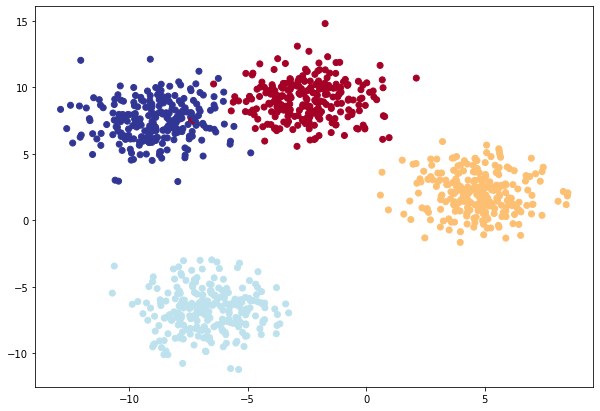

In [1]:
## 1. Creating a multi-class dataset
import torch
from torch import nn 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation 
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create a multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu); 

 ### Building a multi-class classification model in PyTorch

In [2]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [3]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    """Initialize multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8
      super().__init__()

    Returns:

    Example:
    """
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  
  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_0 = BlobModel(input_features=2, 
                    output_features=4,
                    hidden_units=8).to(device)
print(model_0)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [4]:
print(X_blob_train.shape, y_blob_train[:5])

torch.Size([800, 2]) tensor([1, 0, 2, 2, 0])


In [5]:
print(torch.unique(y_blob_train))

tensor([0, 1, 2, 3])


## Create a loss function and an optimizer for a multi-class classification model

In [17]:
# Create a loss function for a multi-class classification - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can change

In [18]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

 ## Getting prediction probabilities for a multi-class PyTorch model

 In order to evaluate and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels

 Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [19]:
# Let's get some raw outputs of our model (logits)
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_blob_test.to(device))

print(y_logits[:10])

tensor([[-0.1760,  0.4010,  0.3548, -0.4314],
        [-0.0080,  0.4304,  0.3582, -0.5994],
        [ 0.7905,  0.0640,  0.2782, -1.2925],
        [-0.0419,  0.1444,  0.2085, -0.3856],
        [-0.1547,  0.5161,  0.4356, -0.5342],
        [ 0.0260,  0.4666,  0.3808, -0.6556],
        [ 0.9130, -0.1412,  0.1913, -1.3161],
        [-0.1648,  0.4614,  0.3972, -0.4853],
        [ 0.8439,  0.1971,  0.3328, -1.4027],
        [-0.1620,  0.4766,  0.4078, -0.4989]], device='cuda:0')


In [20]:
print(y_blob_test[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


In [21]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.1760,  0.4010,  0.3548, -0.4314],
        [-0.0080,  0.4304,  0.3582, -0.5994],
        [ 0.7905,  0.0640,  0.2782, -1.2925],
        [-0.0419,  0.1444,  0.2085, -0.3856],
        [-0.1547,  0.5161,  0.4356, -0.5342]], device='cuda:0')
tensor([[0.1903, 0.3388, 0.3235, 0.1474],
        [0.2200, 0.3410, 0.3173, 0.1218],
        [0.4530, 0.2191, 0.2714, 0.0564],
        [0.2382, 0.2870, 0.3060, 0.1689],
        [0.1837, 0.3592, 0.3314, 0.1257]], device='cuda:0')


In [22]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0,
        0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        2, 1, 0, 1, 1, 2, 0, 1], device='cuda:0')

In [23]:
print(y_blob_test)

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])


In [24]:
print(y_preds==y_blob_test.to(device))

tensor([ True, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

## Create a training loop and testing loop for a multi-class PyTorch model

In [30]:
# Fit the multi-class model to data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data to the target device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_blob_train)
  y_pred = torch.round(torch.softmax(y_logits, dim=1)).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward pass 
    test_logits = model_0(X_blob_test)
    test_preds = torch.round(torch.softmax(test_logits, dim=1)).argmax(dim=1)

    # Calculate the loss
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)
    
  # Print out what's happpenin'
  if epoch % 100 == 0:
    print(f"Epoch {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch 0 | Loss 1.44031, Acc: 25.12% | Test Loss: 1.35603, Test acc: 25.50%
Epoch 100 | Loss 0.03790, Acc: 99.25% | Test Loss: 0.02838, Test acc: 99.50%
Epoch 200 | Loss 0.02667, Acc: 99.25% | Test Loss: 0.01711, Test acc: 99.50%
Epoch 300 | Loss 0.02436, Acc: 99.25% | Test Loss: 0.01443, Test acc: 99.50%
Epoch 400 | Loss 0.02337, Acc: 99.25% | Test Loss: 0.01311, Test acc: 99.50%
Epoch 500 | Loss 0.02275, Acc: 99.25% | Test Loss: 0.01234, Test acc: 99.50%
Epoch 600 | Loss 0.02229, Acc: 99.25% | Test Loss: 0.01181, Test acc: 99.50%
Epoch 700 | Loss 0.02191, Acc: 99.25% | Test Loss: 0.01134, Test acc: 99.50%
Epoch 800 | Loss 0.02159, Acc: 99.25% | Test Loss: 0.01093, Test acc: 99.50%
Epoch 900 | Loss 0.02130, Acc: 99.25% | Test Loss: 0.01058, Test acc: 99.50%


## Making and evaluating preditions with a PyTorch multi-class model

In [31]:
# Make predictions 
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_blob_test)

# View the first 10 predictions
print(y_logits[:10])

tensor([[-1.4599, 10.0377, -1.9573, -6.4907],
        [ 2.8161, -6.2561, -6.2565,  9.1872],
        [-4.7940, -0.5696, 11.3919, -2.8193],
        [-1.9778,  8.0786, -0.9076, -4.1492],
        [ 7.3447, -1.4125, -6.2894, -4.6143],
        [ 2.8610, -7.3251, -7.1794, 11.3761],
        [-3.4431, -0.6954, 10.4859, -3.8890],
        [ 8.5411, -5.2624, -6.1694, -2.3621],
        [-6.9971, -0.3416, 13.5166, -1.6926],
        [ 7.9955, -3.7903, -6.1270, -3.2248]], device='cuda:0')


In [32]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 1, 0, 2, 1, 1, 0, 1, 0, 1], device='cuda:0')

### Creating the `plot_decision_boundary` function in order to better visualize the prediction from the model

In [34]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

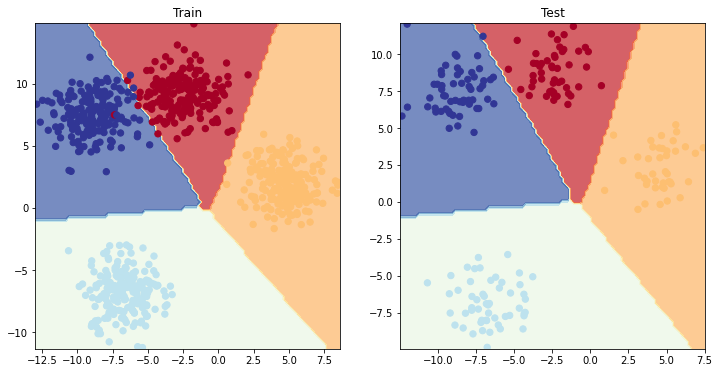

In [35]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)